In [1]:
import numpy as np
import pandas as pd

In [2]:
import matplotlib.pylab as plt
%matplotlib inline
from matplotlib.pylab import rcParams
rcParams['figure.figsize']=10,6

In [3]:
dataset=pd.read_csv('AirPassengers.csv')

In [4]:
dataset

,Month,#Passengers
0,1949-01,112
1,1949-02,118
2,1949-03,132
3,1949-04,129
4,1949-05,121
5,1949-06,135
6,1949-07,148
7,1949-08,148
8,1949-09,136
9,1949-10,119


#parse string to date time type


In [5]:
dataset['Month']=pd.to_datetime(dataset['Month'],infer_datetime_format=True)

In [6]:
indexedDataset=dataset.set_index(['Month'])

In [7]:
indexedDataset

,#Passengers
Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121
1949-06-01,135
1949-07-01,148
1949-08-01,148
1949-09-01,136


In [8]:
from datetime import datetime
indexedDataset.head(5)


,#Passengers
Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121


In [9]:
indexedDataset.tail(5)

,#Passengers
Month,
1960-08-01,606
1960-09-01,508
1960-10-01,461
1960-11-01,390
1960-12-01,432


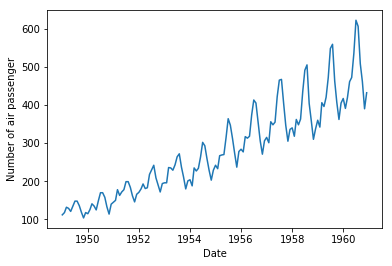

In [10]:
plt.xlabel("Date")
plt.ylabel("Number of air passenger")
plt.plot(indexedDataset)

#now check the stationarity


In [11]:
rolmean=indexedDataset.rolling(window=12).mean()
rolstd=indexedDataset.rolling(window=12).std()

In [12]:
print(rolmean,rolstd)

            #Passengers
Month                  
1949-01-01          NaN
1949-02-01          NaN
1949-03-01          NaN
1949-04-01          NaN
1949-05-01          NaN
1949-06-01          NaN
1949-07-01          NaN
1949-08-01          NaN
1949-09-01          NaN
1949-10-01          NaN
1949-11-01          NaN
1949-12-01   126.666667
1950-01-01   126.916667
1950-02-01   127.583333
1950-03-01   128.333333
1950-04-01   128.833333
1950-05-01   129.166667
1950-06-01   130.333333
1950-07-01   132.166667
1950-08-01   134.000000
1950-09-01   135.833333
1950-10-01   137.000000
1950-11-01   137.833333
1950-12-01   139.666667
1951-01-01   142.166667
1951-02-01   144.166667
1951-03-01   147.250000
1951-04-01   149.583333
1951-05-01   153.500000
1951-06-01   155.916667
...                 ...
1958-07-01   376.333333
1958-08-01   379.500000
1958-09-01   379.500000
1958-10-01   380.500000
1958-11-01   380.916667
1958-12-01   381.000000
1959-01-01   382.666667
1959-02-01   384.666667
1959-03-01   388

#plotting rolls stats


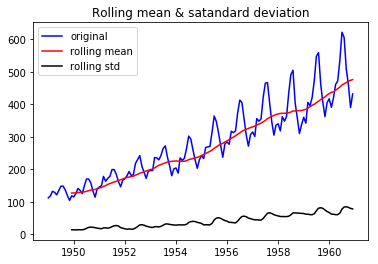

In [13]:
origin=plt.plot(indexedDataset,color='blue',label='original')
mean=plt.plot(rolmean,color='red',label='rolling mean')
std=plt.plot(rolstd,color='black',label='rolling std')
plt.legend(loc='best')
plt.title('Rolling mean & satandard deviation')
plt.show(block=False)

#perform dickey-filler test

In [14]:
from statsmodels.tsa.stattools import adfuller

In [15]:
print('Results of Dickey-Fuller test:')
dftest=adfuller(indexedDataset['#Passengers'],autolag='AIC')
dfoutput=pd.Series(dftest[0:4],index=['TestStatistics','p-value','#Lags-Used','Number of Observations used'])
for key,value in dftest[4].items():
    dfoutput['Critical Value(%s)' %key]=value

print(dfoutput)
    

Results of Dickey-Fuller test:
TestStatistics                   0.815369
p-value                          0.991880
#Lags-Used                      13.000000
Number of Observations used    130.000000
Critical Value(1%)              -3.481682
Critical Value(5%)              -2.884042
Critical Value(10%)             -2.578770
dtype: float64


#estimating trend


In [16]:
indexedDataset_logscale = np.log(indexedDataset)

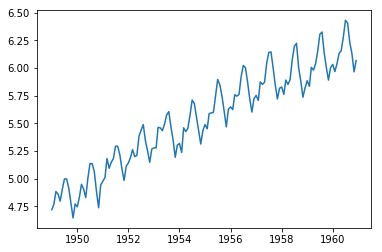

In [17]:
plt.plot(indexedDataset_logscale)

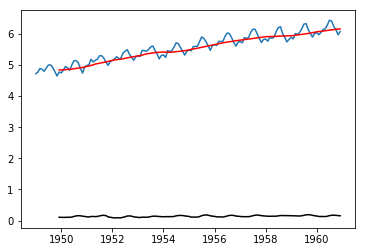

In [18]:
movingAverage=indexedDataset_logscale.rolling(window=12).mean()
movingStd=indexedDataset_logscale.rolling(window=12).std()
plt.plot(indexedDataset_logscale)
plt.plot(movingAverage,color='red')
plt.plot(movingStd,color='black')


#diff between moving average & actual number of passenger 

In [19]:
datasetLogscaleMinusmovingAverage=indexedDataset_logscale-movingAverage

In [20]:
datasetLogscaleMinusmovingAverage

,#Passengers
Month,
1949-01-01,NaN
1949-02-01,NaN
1949-03-01,NaN
1949-04-01,NaN
1949-05-01,NaN
1949-06-01,NaN
1949-07-01,NaN
1949-08-01,NaN
1949-09-01,NaN


In [21]:
datasetLogscaleMinusmovingAverage.head(12)

,#Passengers
Month,
1949-01-01,NaN
1949-02-01,NaN
1949-03-01,NaN
1949-04-01,NaN
1949-05-01,NaN
1949-06-01,NaN
1949-07-01,NaN
1949-08-01,NaN
1949-09-01,NaN


#removing Not a number 

In [22]:
datasetLogscaleMinusmovingAverage.dropna(inplace=True)
datasetLogscaleMinusmovingAverage.head(10)

,#Passengers
Month,
1949-12-01,-0.065494
1950-01-01,-0.093449
1950-02-01,-0.007566
1950-03-01,0.099416
1950-04-01,0.052142
1950-05-01,-0.027529
1950-06-01,0.139881
1950-07-01,0.260184
1950-08-01,0.248635


#again check completely

In [23]:
from statsmodels.tsa.stattools import adfuller

In [24]:
def test_stationarity(timeseries):
    #determining rolls stats
    movingAverage=timeseries.rolling(window=12).mean()
    movingStd=timeseries.rolling(window=12).std()
    
    #plot rolling statistics
    
    orig =plt.plot(timeseries,color='blue',label='original')
    mean=plt.plot(movingAverage,color='red',label='Rolling mean')
    std=plt.plot(movingStd,color='black',label='rolling std')
    
    plt.legend(loc='best')
    plt.title('rolling mean and std')
    plt.show(block=False)
    
    #perform Dickey-Fuller Test
    
    print('results of dickey fuller test:')
    dftest=adfuller(timeseries['#Passengers'],autolag='AIC')
    dfoutput=pd.Series(dftest[0:4],index=['test statistics','p-value','#Lags used','Number of observations used'])
    
    for key,value in dftest[4].items():
        dfoutput['Critical value[%s]' %key]=value
        
    print(dfoutput)    

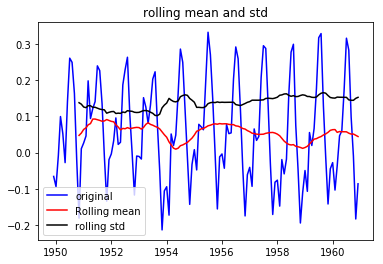

results of dickey fuller test:
test statistics                 -3.162908
p-value                          0.022235
#Lags used                      13.000000
Number of observations used    119.000000
Critical value[1%]              -3.486535
Critical value[5%]              -2.886151
Critical value[10%]             -2.579896
dtype: float64


In [25]:
test_stationarity(datasetLogscaleMinusmovingAverage)

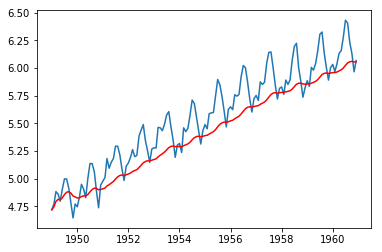

In [26]:
exponentialDecayWeightedAverage= indexedDataset_logscale.ewm(halflife=12,min_periods=0,adjust=True).mean()
plt.plot(indexedDataset_logscale)
plt.plot(exponentialDecayWeightedAverage,color='red')

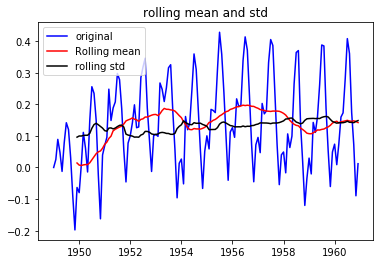

results of dickey fuller test:
test statistics                 -3.601262
p-value                          0.005737
#Lags used                      13.000000
Number of observations used    130.000000
Critical value[1%]              -3.481682
Critical value[5%]              -2.884042
Critical value[10%]             -2.578770
dtype: float64


In [27]:
datasetLogscaleMinusmovingExponentialDecayAverage= indexedDataset_logscale - exponentialDecayWeightedAverage
test_stationarity(datasetLogscaleMinusmovingExponentialDecayAverage)

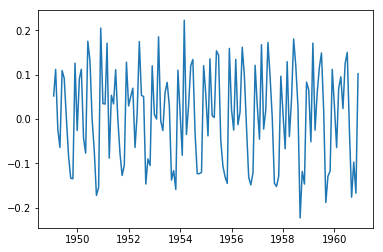

In [28]:
datasetLogDiffShifting=indexedDataset_logscale - indexedDataset_logscale.shift()
plt.plot(datasetLogDiffShifting)

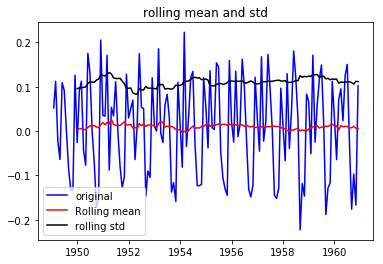

results of dickey fuller test:
test statistics                 -2.717131
p-value                          0.071121
#Lags used                      14.000000
Number of observations used    128.000000
Critical value[1%]              -3.482501
Critical value[5%]              -2.884398
Critical value[10%]             -2.578960
dtype: float64


In [29]:
datasetLogDiffShifting.dropna(inplace=True)
test_stationarity(datasetLogDiffShifting)

#components of timeseries(i guess)

In [30]:
from statsmodels.tsa.seasonal import seasonal_decompose
decomposition=seasonal_decompose(indexedDataset_logscale)

In [31]:
trend= decomposition.trend
seasonal=decomposition.seasonal
residual=decomposition.resid



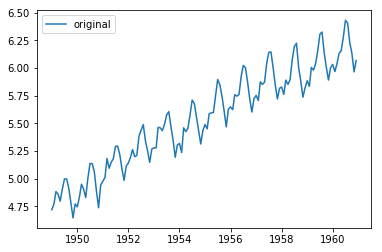

In [32]:

plt.plot(indexedDataset_logscale,label='original')
plt.legend(loc='best')



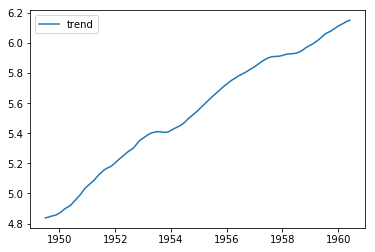

In [33]:

plt.plot(trend,label='trend')
plt.legend(loc='best')


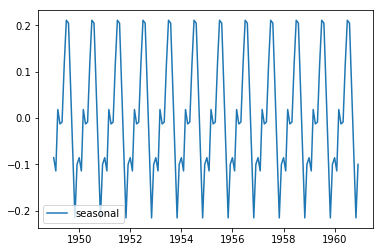

In [34]:

plt.plot(seasonal,label='seasonal')
plt.legend(loc='best')



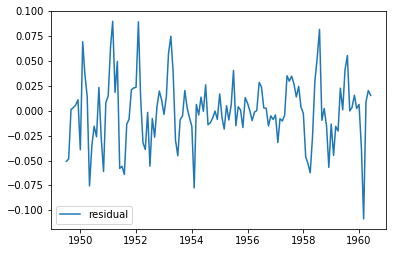

In [35]:

plt.plot(residual,label='residual')
plt.legend(loc='best')

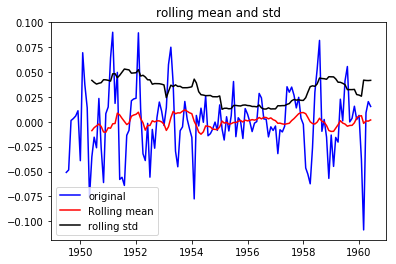

results of dickey fuller test:
test statistics               -6.332387e+00
p-value                        2.885059e-08
#Lags used                     9.000000e+00
Number of observations used    1.220000e+02
Critical value[1%]            -3.485122e+00
Critical value[5%]            -2.885538e+00
Critical value[10%]           -2.579569e+00
dtype: float64


In [36]:
decomposedLogdata=residual
decomposedLogdata.dropna(inplace=True)
test_stationarity(decomposedLogdata)

#acf and pacf plots

In [37]:
from statsmodels.tsa.stattools import acf, pacf

lag_acf=acf(datasetLogDiffShifting,nlags=20)
lag_pacf=pacf(datasetLogDiffShifting,nlags=20,method='ols')



#plot ACF and PACF

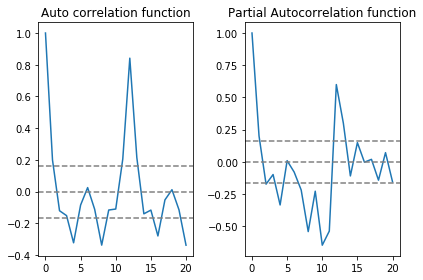

In [38]:
plt.subplot(121)
plt.plot(lag_acf)
plt.axhline(y=0,linestyle='--',color='gray')
plt.axhline(y=-1.96/np.sqrt(len(datasetLogDiffShifting)),linestyle='--',color='gray')
plt.axhline(y=1.96/np.sqrt(len(datasetLogDiffShifting)),linestyle='--',color='gray')

plt.title('Auto correlation function')

#plot Pacf

plt.subplot(122)
plt.plot(lag_pacf)
plt.axhline(y=0,linestyle='--',color='gray')
plt.axhline(y=-1.96/np.sqrt(len(datasetLogDiffShifting)),linestyle='--',color='gray')
plt.axhline(y=1.96/np.sqrt(len(datasetLogDiffShifting)),linestyle='--',color='gray')
plt.title('Partial Autocorrelation function')
plt.tight_layout()



#arima model starts


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\ProgramData\Anaconda3\lib\site-packages\scipy\signal\signaltools.py:1341: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  out_full[ind] += zi
C:\ProgramData\Anaconda3\lib\site-packages\scipy\signal\signaltools.py:1344: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will 

plotting AR model


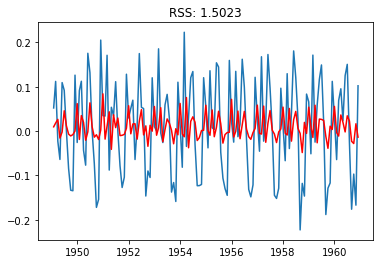

In [57]:
from statsmodels.tsa.arima_model import ARIMA

#ar model

model=ARIMA(indexedDataset_logscale,order=(2,1,0))

results_AR= model.fit(disp=-1)
plt.plot(datasetLogDiffShifting)
plt.plot(results_AR.fittedvalues,color='red')
plt.title('RSS: %.4f' %sum((results_AR.fittedvalues-datasetLogDiffShifting["#Passengers"])**2))
print('plotting AR model') 

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


plotting MA model


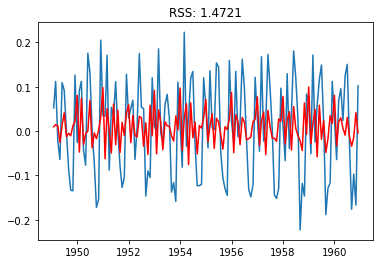

In [40]:
 #ma model

model=ARIMA(indexedDataset_logscale,order=(0,1,2))

results_MA= model.fit(disp=-1)
plt.plot(datasetLogDiffShifting)
plt.plot(results_MA.fittedvalues,color='red')
plt.title('RSS: %.4f' %sum((results_MA.fittedvalues-datasetLogDiffShifting["#Passengers"])**2))
print('plotting MA model') 

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


plotting ARIMA model


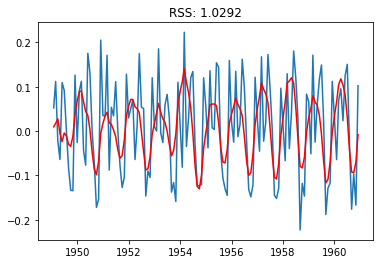

In [41]:
#arima model

model=ARIMA(indexedDataset_logscale,order=(2,1,2))

results_ARIMA= model.fit(disp=-1)
plt.plot(datasetLogDiffShifting)
plt.plot(results_ARIMA.fittedvalues,color='red')
plt.title('RSS: %.4f' %sum((results_ARIMA.fittedvalues-datasetLogDiffShifting["#Passengers"])**2))
print('plotting ARIMA model') 

#prediction time value

In [45]:
predictions_Arima_diff= pd.Series(results_ARIMA.fittedvalues,copy=True)
print(predictions_Arima_diff.head())

Month
1949-02-01    0.009580
1949-03-01    0.017491
1949-04-01    0.027670
1949-05-01   -0.004521
1949-06-01   -0.023890
dtype: float64


#convert to cumulative sum

In [43]:
predictions_Arima_diff_cumsum= predictions_Arima_diff.cumsum()

print(predictions_Arima_diff_cumsum.head())

Month
1949-02-01    0.009580
1949-03-01    0.027071
1949-04-01    0.054742
1949-05-01    0.050221
1949-06-01    0.026331
dtype: float64


In [50]:
predictions_ARIMA_log=pd.Series(indexedDataset_logscale['#Passengers'].ix[0],index=indexedDataset_logscale.index)
predictions_ARIMA_log=predictions_ARIMA_log.add(predictions_Arima_diff_cumsum,fill_value=0)
predictions_ARIMA_log.head()

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  """Entry point for launching an IPython kernel.


Month
1949-01-01    4.718499
1949-02-01    4.728079
1949-03-01    4.745570
1949-04-01    4.773241
1949-05-01    4.768720
dtype: float64

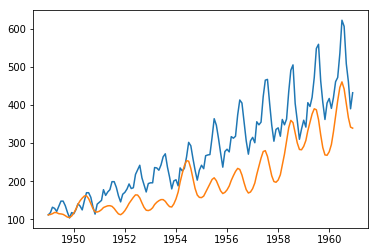

In [54]:
predictions_Arima=np.exp(predictions_ARIMA_log)
plt.plot(indexedDataset)
plt.plot(predictions_Arima)


#predictons starts finally

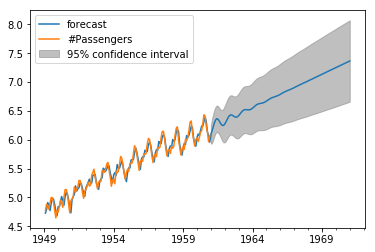

In [56]:
results_ARIMA.plot_predict(1,264)
x=results_ARIMA.forecast(steps=120)